<a href="https://colab.research.google.com/github/chiragtyagi2003/idex/blob/main/Aerial_Image_Segmentaiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install patchify
!pip install segmentation_models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.5 MB/s eta 0:00:00


In [2]:
import os
import cv2
import numpy as np

from matplotlib import pyplot as plt
from patchify import patchify
from PIL import Image
# import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()


In [3]:
from google.colab import drive

# mount the drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
root_dir = "/content/gdrive/My Drive/uae/data/"


In [5]:
patch_size = 256



In [7]:
# read images from respective "images" dir
# crop all images to multiple of 256

image_dataset = []
mask_dataset = []
for path, subdirs, files in os.walk(root_dir):
  # print(path)

  # obtain dir name from the path by extracting last arg
  dir_name = path.split(os.path.sep)[-1]


  if dir_name == "images":
        images = sorted([image_name for image_name in files if image_name.endswith(".jpg")])  # WE ARE SORTING HERE SO THEY LINED WITH THIER CORRESPONDING MASKS WHILE PATCHING
        for image_name in images:
            image = cv2.imread(os.path.join(path, image_name), 1)
            SIZE_X = (image.shape[1] // patch_size) * patch_size
            SIZE_Y = (image.shape[0] // patch_size) * patch_size
            image = Image.fromarray(image)
            image = image.crop((0, 0, SIZE_X, SIZE_Y))
            image = np.array(image)

            print("Now patchifying image:", os.path.join(path, image_name))
            patches_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)

            for i in range(patches_img.shape[0]):
                for j in range(patches_img.shape[1]):
                    single_patch_img = patches_img[i, j, :, :]
                    single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
                    # #single_patch_img = (single_patch_img.astype('float32')) / 255.
                    single_patch_img = single_patch_img[0] #Drop the extra unecessary dimension that patchify adds.
                    image_dataset.append(single_patch_img)


  elif dir_name == "masks":
        masks = sorted([mask_name for mask_name in files if mask_name.endswith(".png")])   # WE ARE SORTING THEM SO THEY ARE LINED WITH THEIR CORRESPONDING IMAGES WHILE PATCHING
        for mask_name in masks:
            mask = cv2.imread(os.path.join(path, mask_name), 1)
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
            SIZE_X = (mask.shape[1] // patch_size) * patch_size
            SIZE_Y = (mask.shape[0] // patch_size) * patch_size
            mask = Image.fromarray(mask)
            mask = mask.crop((0, 0, SIZE_X, SIZE_Y))
            mask = np.array(mask)

            print("Now patchifying mask:", os.path.join(path, mask_name))
            patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)

            for i in range(patches_mask.shape[0]):
                for j in range(patches_mask.shape[1]):
                    single_patch_mask = patches_mask[i, j, :, :]
                    single_patch_mask = single_patch_mask[0] #Drop the extra unecessary dimension that patchify adds.
                    mask_dataset.append(single_patch_mask)

  # if dir_name == "images":
  #   images = os.listdir(path)



    # for i, image_name in enumerate(images):
    #   if image_name.endswith(".jpg"):

    #     image = cv2.imread(path + "/" + image_name, 1)
    #     SIZE_X = (image.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
    #     SIZE_Y = (image.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
    #     image = Image.fromarray(image)
    #     image = image.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
    #             #image = image.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
    #     image = np.array(image)

    #             #Extract patches from each image
    #     print("Now patchifying image:", path+"/"+image_name)
    #     patches_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap



    #     for i in range(patches_img.shape[0]):
    #       for j in range(patches_img.shape[1]):
    #         single_patch_img = patches_img[i,j,:,:]

    #         #Use minmaxscaler instead of just dividing by 255.
    #         single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)

    #         #single_patch_img = (single_patch_img.astype('float32')) / 255.
    #         single_patch_img = single_patch_img[0] #Drop the extra unecessary dimension that patchify adds.
    #         image_dataset.append(single_patch_img)



Now patchifying image: /content/gdrive/My Drive/uae/data/Tile 1/images/image_part_001.jpg
Now patchifying image: /content/gdrive/My Drive/uae/data/Tile 1/images/image_part_002.jpg
Now patchifying image: /content/gdrive/My Drive/uae/data/Tile 1/images/image_part_003.jpg
Now patchifying image: /content/gdrive/My Drive/uae/data/Tile 1/images/image_part_004.jpg
Now patchifying image: /content/gdrive/My Drive/uae/data/Tile 1/images/image_part_005.jpg
Now patchifying image: /content/gdrive/My Drive/uae/data/Tile 1/images/image_part_006.jpg
Now patchifying image: /content/gdrive/My Drive/uae/data/Tile 1/images/image_part_007.jpg
Now patchifying image: /content/gdrive/My Drive/uae/data/Tile 1/images/image_part_008.jpg
Now patchifying image: /content/gdrive/My Drive/uae/data/Tile 1/images/image_part_009.jpg
Now patchifying mask: /content/gdrive/My Drive/uae/data/Tile 1/masks/image_part_001.png
Now patchifying mask: /content/gdrive/My Drive/uae/data/Tile 1/masks/image_part_002.png
Now patchifyin

In [8]:
# print(image_dataset)
print(len(image_dataset))

1305


In [9]:
print(len(mask_dataset))

1305


In [12]:
# print(mask_dataset)

print(len(mask_dataset))

1305


In [10]:

image_dataset = np.array(image_dataset)
mask_dataset =  np.array(mask_dataset)


In [ ]:
print(image_dataset[0])

## Take Care of Labels

744


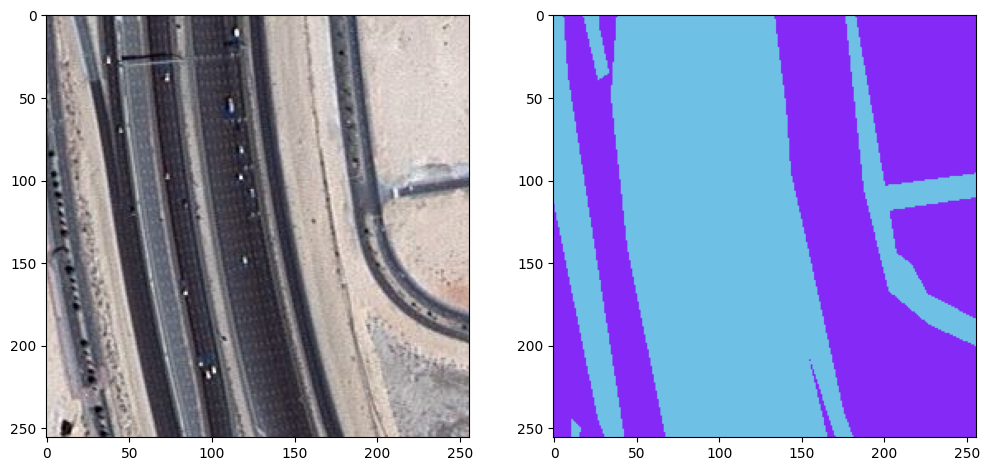

In [14]:
#Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
print(image_number)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (patch_size, patch_size, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (patch_size, patch_size, 3)))
plt.show()



## TAKING CARE OF LABELS

In [15]:
Building: #3C1098
Land (unpaved area): #8429F6
Road: #6EC1E4
Vegetation: #FEDD3A
Water: #E2A929
Unlabeled: #9B9B9B

SyntaxError: ignored

In [ ]:
"""
RGB to HEX: (Hexadecimel --> base 16)
This number divided by sixteen (integer division; ignoring any remainder) gives
the first hexadecimal digit (between 0 and F, where the letters A to F represent
the numbers 10 to 15). The remainder gives the second hexadecimal digit.
0-9 --> 0-9
10-15 --> A-F

Example: RGB --> R=201, G=, B=

R = 201/16 = 12 with remainder of 9. So hex code for R is C9 (remember C=12)

Calculating RGB from HEX: #3C1098
3C = 3*16 + 12 = 60
10 = 1*16 + 0 = 16
98 = 9*16 + 8 = 152

"""

In [16]:
#Convert HEX to RGB array
# Try the following to understand how python handles hex values...
a=int('3C', 16)  #3C with base 16. Should return 60.
print(a)


60


In [17]:
#Do the same for all RGB channels in each hex code to convert to RGB
Building = '#3C1098'.lstrip('#')
Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152

Land = '#8429F6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246

Road = '#6EC1E4'.lstrip('#')
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228

Vegetation =  'FEDD3A'.lstrip('#')
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58

Water = 'E2A929'.lstrip('#')
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41

Unlabeled = '#9B9B9B'.lstrip('#')
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4))) #155, 155, 155


In [19]:
print(Water)

[226 169  41]


In [20]:
# NOW WE WILL INTEGER CODE THE LABELS.. FROM 0 TO 6
# Now replace RGB to integer values to be used as labels.
#Find pixels with combination of RGB for the above defined arrays...
#if matches then replace all values in that pixel with a specific integer
def rgb_to_2D_label(label):
    """
    Suply our labale masks as input in RGB format.
    Replace pixels with specific RGB values ...
    """
    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5

    label_seg = label_seg[:,:,0]  #Just take the first channel, no need for all 3 channels

    return label_seg


In [21]:
# NOW USING THE ABOVE DEFINED FUCNTION WE WILL CONVERT
# THE RGB VALUES IN MASKS TO INTEGER LABELS
# THE 4TH ELEMENT -> 1 IN SHAPE SHOWS THAT THE CLASSES
# ARE REPRESENTED AS INTEGER VARIABLES
labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_2D_label(mask_dataset[i])
    labels.append(label)

labels = np.array(labels)
labels = np.expand_dims(labels, axis=3)

In [22]:
print(labels.shape)

(1305, 256, 256, 1)


Unique labels in label dataset are:  [0 1 2 3 4 5]


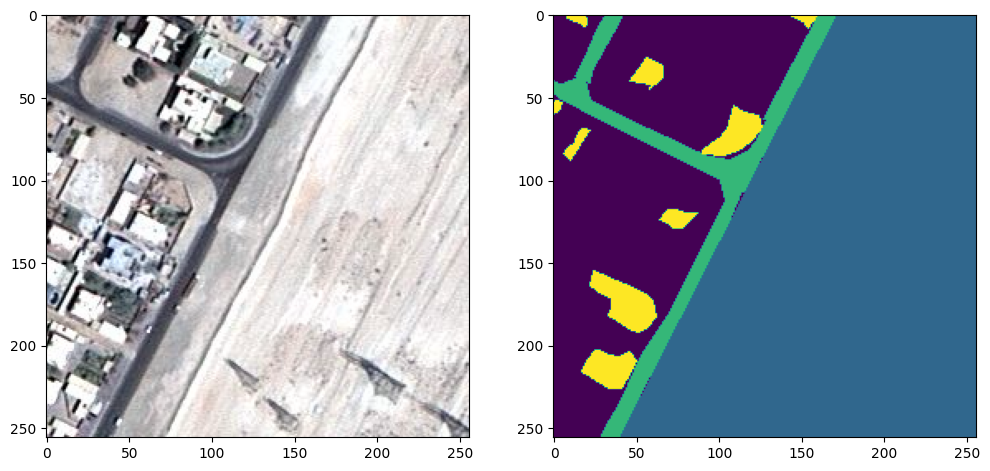

In [23]:
# SOME SANITY CHECKS
print("Unique labels in label dataset are: ", np.unique(labels))

#Another Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(labels[image_number][:,:,0])
plt.show()


In [24]:
#NOW LETS CONVERT THE INTEGER LABELS TO ONE HOT ENOCDED

n_classes = len(np.unique(labels))
from keras.utils import to_categorical
labels_cat = to_categorical(labels, num_classes=n_classes)

In [25]:
# THE 6 HERE REPERESENTS 6 CLASSES, REPRESETENTED IN BINARY
print(labels_cat.shape)

(1305, 256, 256, 6)


### TRAINING PART

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_cat, test_size = 0.20, random_state = 42)

In [27]:
# WE ADD A DROPOUT LAYER TO THE SIMPLE UNET MODEL ARCH
# AND DEFINE JACARD COEFF
# https://youtu.be/jvZm8REF2KY
"""
Standard Unet
Model not compiled here, instead will be done externally to make it
easy to test various loss functions and optimizers.
"""


from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras import backend as K

def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)



################################################################
def multi_unet_model(n_classes=4, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.2)(c1)  # Original 0.1
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.2)(c2)  # Original 0.1
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.2)(c8)  # Original 0.1
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.2)(c9)  # Original 0.1
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])

    #NOTE: Compile the model in the main program to make it easy to test with various loss functions
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #model.summary()

    return model


In [ ]:
 # HERE ALL CLASSES ARE NOT BALANCED
 # SO FOR LOSS FUNCTION WE CAN EXPERIMENT
 # WITH DEFINING WEIGHTS, WE CAN USE DICE LOSS + FOCAL_LOSS TO MAKE UP A TOTAL LOSS
 # INTITIALLY THE WEIGHTS EITHER CAN BE COMPUTED OR CAN BE PROVIDED AS